In [ ]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os 

In [8]:
# STEP 2: Load and combine all CSVs
folder_path = r"D:\internship coll\uber_data"  

csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
df = pd.concat((pd.read_csv(file, encoding='latin1') for file in csv_files), ignore_index=True)

In [9]:
# STEP 3: Basic info
print("Shape of dataset:", df.shape)
print("Columns:", df.columns)
df.head()

Shape of dataset: (20508122, 41)
Columns: Index(['DATE', 'TIME', 'PICK UP ADDRESS', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Date', 'Time', 'PU_Adress', 'Base_No', 'State', 'PuFrom',
       'Address', 'Street', 'PU_Address', 'DO_Address', 'Routing Details',
       'PU_Address.1', 'Status', 'Base Number', 'Base Name', 'Pick Up Date',
       'Number of Trips', 'Number of Vehicles', 'time_of_trip', 'start_lat',
       'start_lng', '    Street_Address ', '    City_State ',
       'dispatching_base_number', 'date', 'active_vehicles', 'trips',
       'Date/Time', 'Lat', 'Lon', 'Base', 'Dispatching_base_num',
       'Pickup_date', 'Affiliated_base_num', 'locationID'],
      dtype='object')


,DATE,TIME,PICK UP ADDRESS,Unnamed: 3,Unnamed: 4,Unnamed: 5,Date,Time,PU_Adress,Base_No,...,active_vehicles,trips,Date/Time,Lat,Lon,Base,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,7/1/2014,12:00:00 AM,"874 E 139th St Mott Haven, BX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7/1/2014,12:01:00 AM,"628 E 141st St Mott Haven, BX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/1/2014,12:01:00 AM,"601 E 156th St South Bronx, BX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7/1/2014,12:01:00 AM,"708 E 138th St Mott Haven, BX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7/1/2014,12:02:00 AM,"700 E 140th St Mott Haven, BX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# STEP 4: Convert Date/Time column and create new features
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Hour'] = df['Date/Time'].dt.hour
df['Day'] = df['Date/Time'].dt.day
df['Weekday'] = df['Date/Time'].dt.weekday
df['Month'] = df['Date/Time'].dt.month
df['Date'] = df['Date/Time'].dt.date
daily_counts = df.groupby('Date').size()
df['Daily_Counts'] = df['Date'].map(daily_counts)

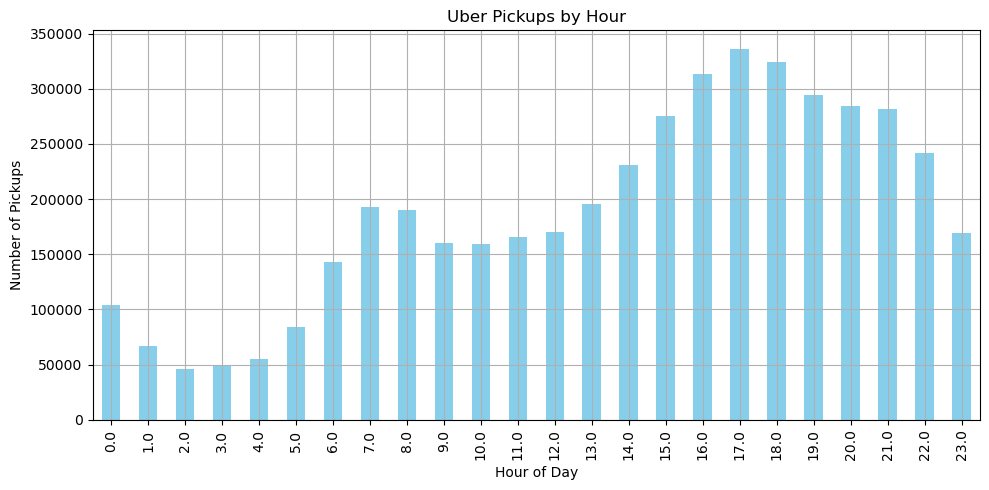

In [11]:
# STEP 5: Hourly Pickups
plt.figure(figsize=(10,5))
df['Hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Uber Pickups by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\legion\AppData\Local\Temp\ipykernel_16848\3846163776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=df, palette='coolwarm')


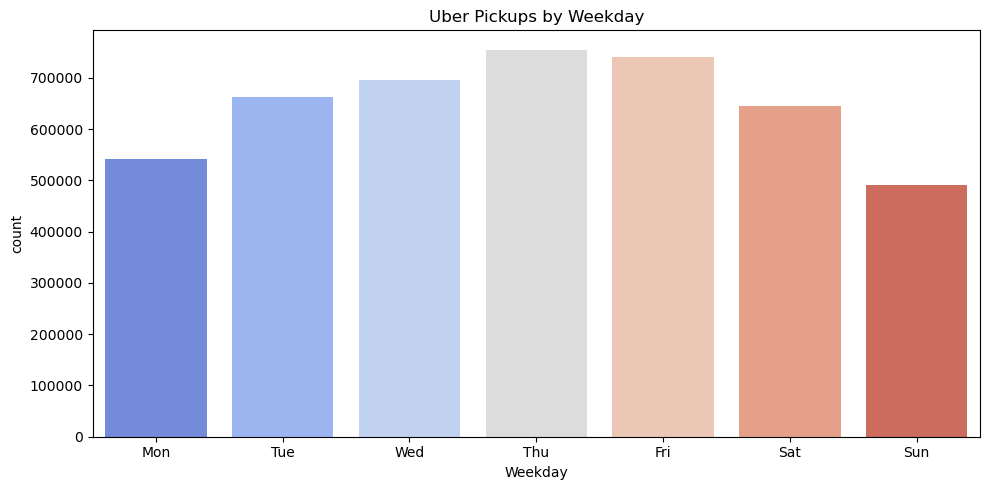

In [12]:
# STEP 6: Weekday Pickups
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', data=df, palette='coolwarm')

plt.xticks(ticks=range(7), labels=days)
plt.title("Uber Pickups by Weekday")
plt.tight_layout()
plt.show()

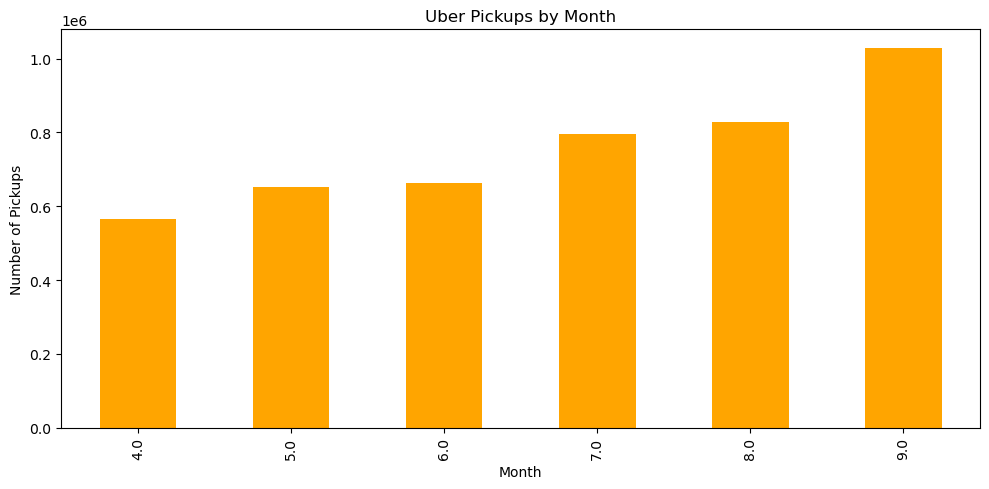

In [13]:
# STEP 7: Monthly Pickups
plt.figure(figsize=(10,5))
df['Month'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Uber Pickups by Month")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.tight_layout()
plt.show()

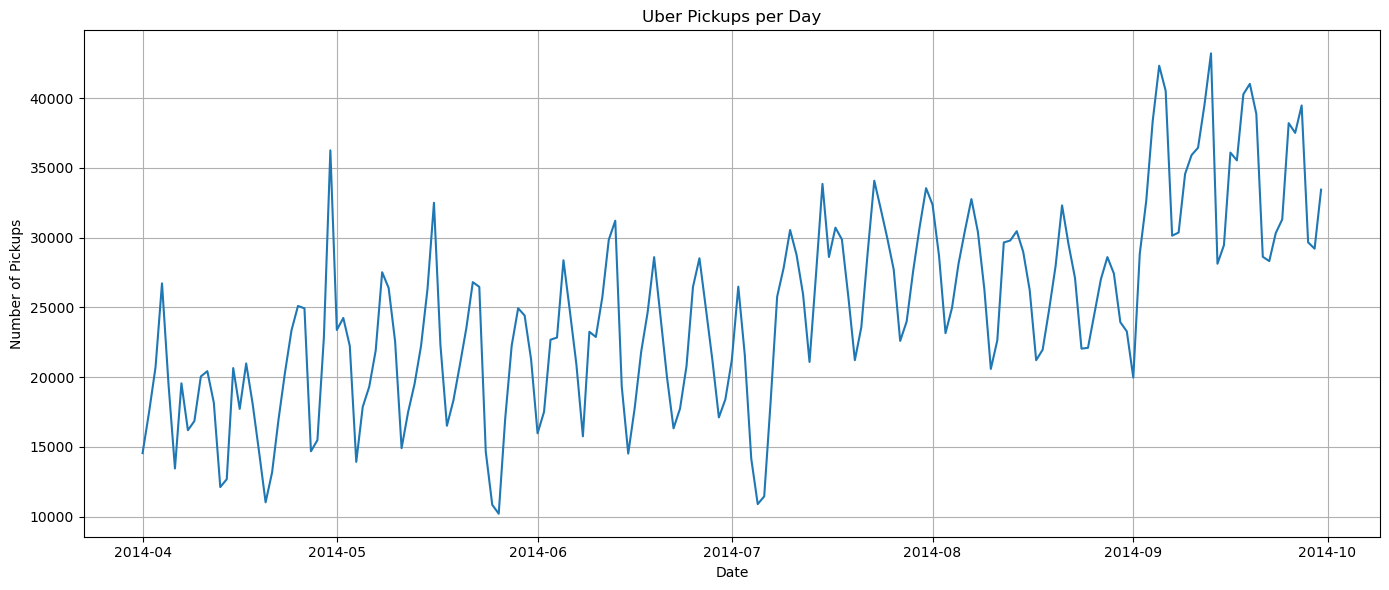

In [14]:
# STEP 8: Time Series of Daily Pickups
df_ts = df.groupby('Date').size()
plt.figure(figsize=(14,6))
df_ts.plot()
plt.title("Uber Pickups per Day")
plt.xlabel("Date")
plt.ylabel("Number of Pickups")
plt.grid(True)
plt.tight_layout()
plt.show()

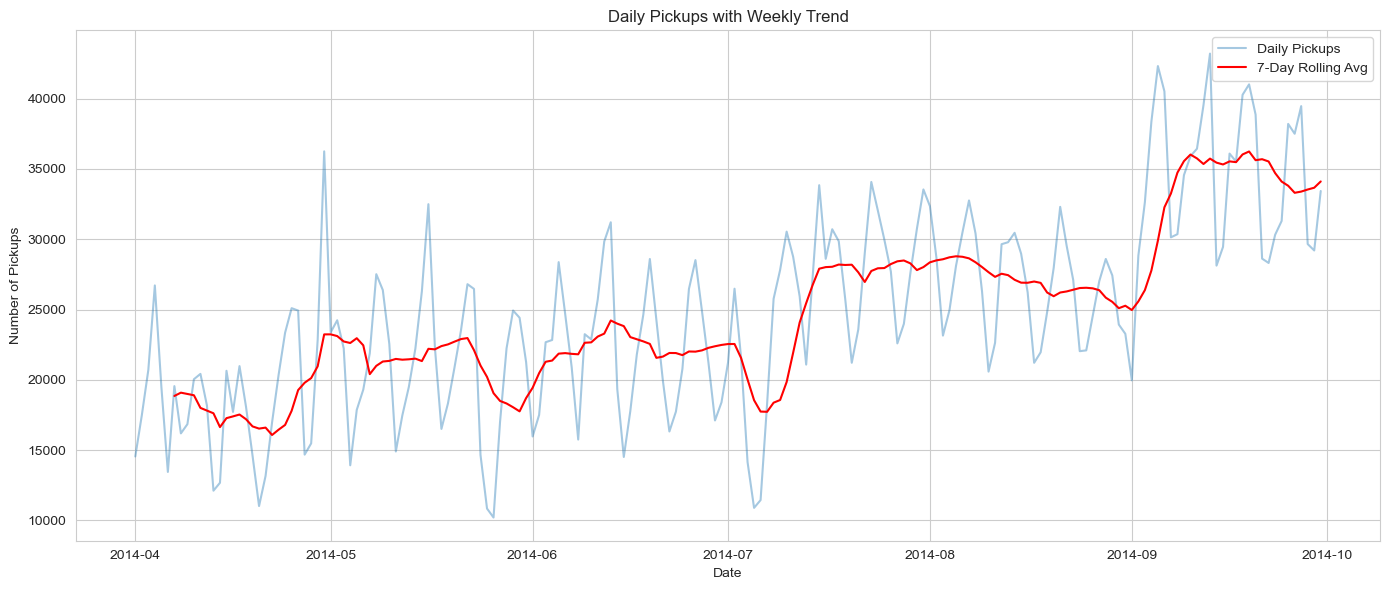

In [ ]:
 #STEP 9: Daily Pickups with Weekly Trend
rolling_avg = daily_counts.rolling(window=7).mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_counts, label='Daily Pickups', alpha=0.4)
plt.plot(rolling_avg, label='7-Day Rolling Avg', color='red')
plt.title("Daily Pickups with Weekly Trend")
plt.xlabel("Date")
plt.ylabel("Number of Pickups")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


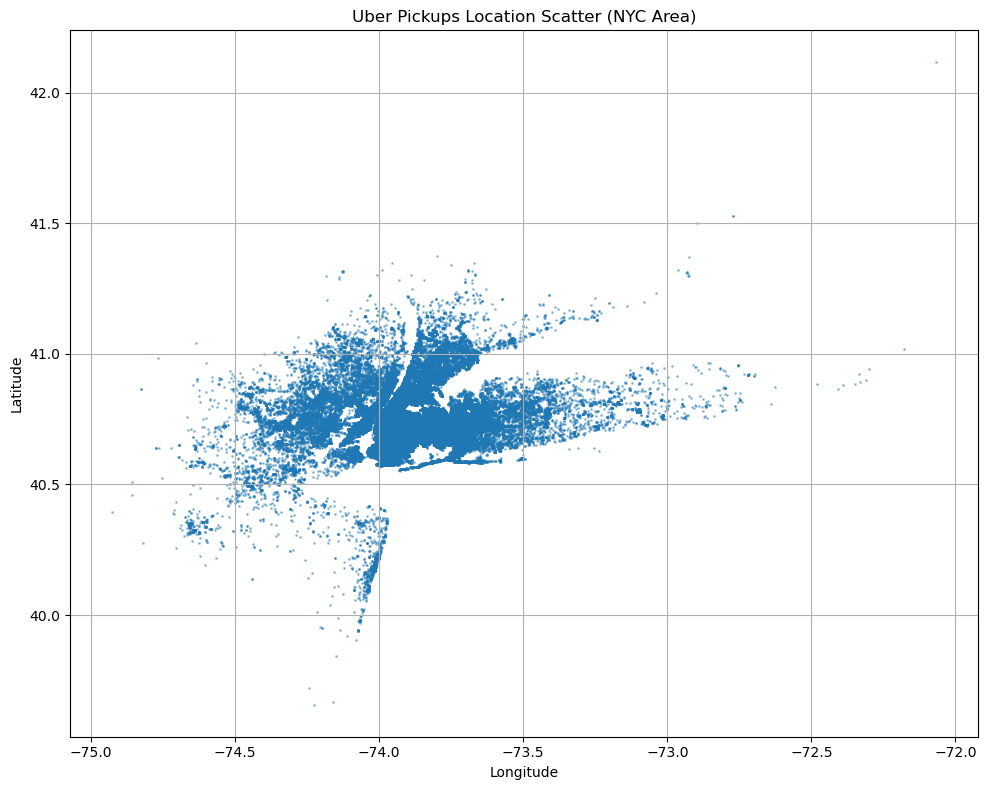

In [ ]:
# STEP 10: Scatter of Pickup Locations
plt.figure(figsize=(10,8))
plt.scatter(df['Lon'], df['Lat'], s=1, alpha=0.4)
plt.title("Uber Pickups Location Scatter (NYC Area)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\legion\AppData\Local\Temp\ipykernel_16848\1239872384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Base', data=df, palette='viridis')


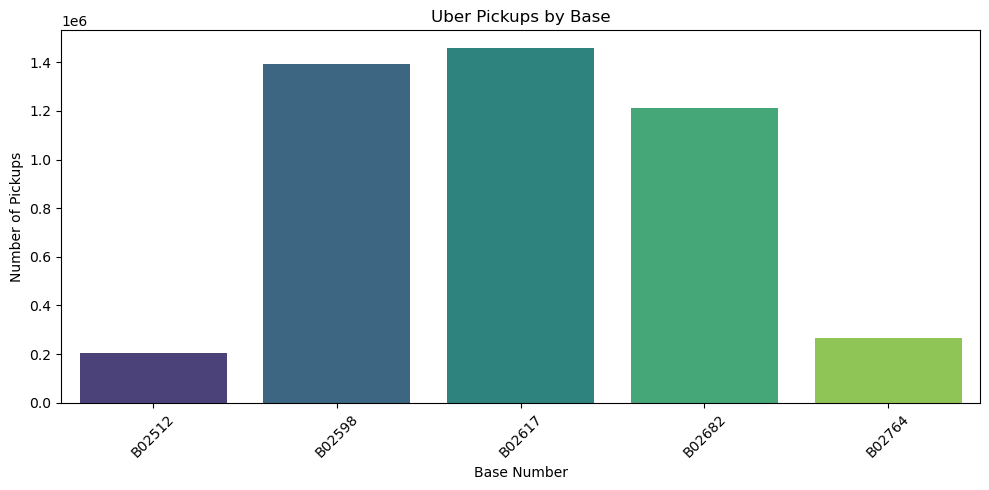

In [16]:
# STEP 10: Base Analysis
plt.figure(figsize=(10,5))
sns.countplot(x='Base', data=df, palette='viridis')

plt.title("Uber Pickups by Base")
plt.xlabel("Base Number")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

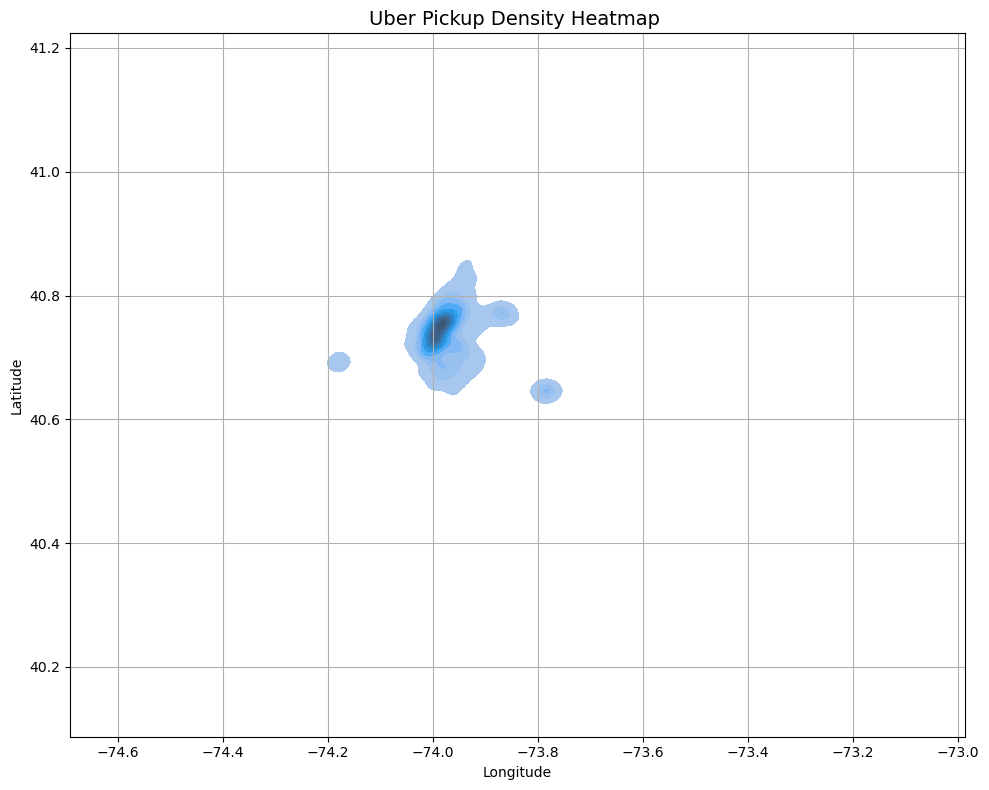

In [20]:
df_sample = df[['Lat', 'Lon']].dropna().sample(n=15000, random_state=10)

# KDE heatmap with Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=df_sample['Lon'],
    y=df_sample['Lat'],
    fill=True,          
)
plt.title("Uber Pickup Density Heatmap ", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

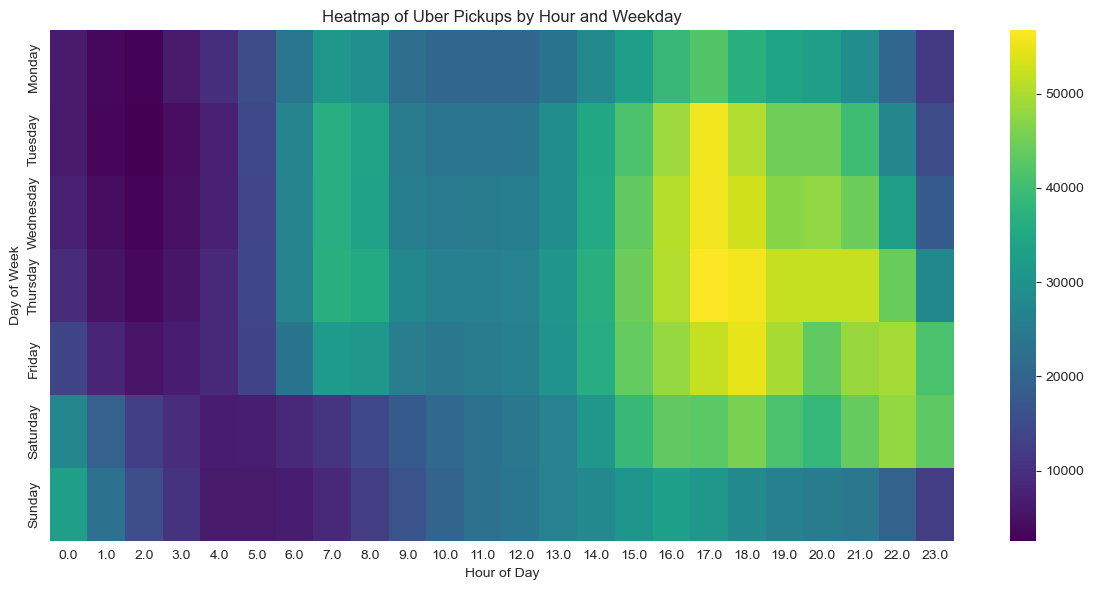

In [35]:
# Group data
df['Weekday'] = df['Date/Time'].dt.day_name()
df['Hour'] = df['Date/Time'].dt.hour
pivot = df.groupby(['Weekday', 'Hour']).size().unstack()

# Reorder days
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(ordered_days)

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='viridis')
plt.title('Heatmap of Uber Pickups by Hour and Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()
